# Predicting Nutrient Gaps: Amini Soil Random Forest (Little Feature Engineering)

## **Introduction**

Welcome! This notebook will guide you through the process of building a machine learning model to predict nutrient gaps in soil.
We'll cover data loading, exploratory data analysis (EDA), feature preprocessing, model training, evaluation, and submission.

### **What You Will Learn**

- How to load and inspect data in Python using `pandas`
- How to explore data with visualizations using `matplotlib` and `seaborn`
- How to preprocess data for machine learning
- How to train a simple machine learning model using `scikit-learn`
- How to evaluate model performance
- How to generate and save predictions for submission

#### **Additional Reading for Beginners**

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Visualization Guide](https://seaborn.pydata.org/tutorial.html)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Let's get started! 🚀


## **Step 1: Load the Data**

We begin by loading the training and test datasets using `pandas`. The dataset consists of different features, with `pH` as the target variable in the training data.

### **Tips for Beginners**

- The `train.csv` file contains both the features and the target variable (`pH`).
- The `test.csv` file contains only the features (we need to predict `pH` for these).
- Always check the first few rows of the dataset using `.head()` to understand its structure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import *
from sklearn.linear_model import LinearRegression
from lightgbm import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

## **Step 2: Exploratory Data Analysis (EDA)**

EDA helps us understand the data better before building a model.

### **Why is EDA Important?**
- It reveals patterns, trends, and potential issues in the data.
- It helps us decide which preprocessing steps are needed.
- It allows us to visualize relationships between variables.

### **Tips for Beginners**
- Always check for missing values and outliers.
- Use histograms to see the distribution of numerical features.
- Correlation heatmaps can help identify which features are most relevant.

Let's explore the data! 📊


In [3]:
# Load datasets
train_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Train.csv')
test_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Test.csv')
train_gap_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Gap_Train.csv')
test_gap_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Gap_Test.csv')
sample_submission = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/SampleSubmission.csv')

In [4]:
train_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46,1300,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52,1400,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,0.362439,15.25,18.900057,16.062401,0.06240,0.030000,44.167717,19.413284,1639.999634,2903.000000,758.999939,2003.999878,1074,24.719807,214.385269,6.725,0.744845,46.00,9.25,8.289246,0.020588,0.003885,1.46,3500,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,0.531739,22.00,17.022963,18.030899,0.03090,0.030000,43.281063,19.539835,1325.000122,2413.000244,631.999939,1961.000000,1044,27.230274,255.713043,6.625,0.708708,43.75,10.00,8.666523,0.016913,0.001714,1.48,2300,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,0.039202,14.75,23.103102,11.000000,0.00000,0.155324,45.654484,18.690720,1628.999512,2685.999023,732.999939,2427.000000,1055,20.434782,86.220909,6.700,0.634153,49.25,7.00,15.139549,0.019791,0.000000,1.43,940,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31


In [5]:
test_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,site_id_hgJpkz,ID_NGS9Bx,69.170794,44.522885,6.86,144,256,910,108,186,0.038132,44.75,1.581062,17.099701,0.0997,0.03,40.674942,18.333445,991.000061,2484.000488,486.000031,1413.000244,817,37.940418,467.619293,6.825,1.056416,25.50,15.25,8.732471,0.016981,0.005831,1.20
1,site_id_olmuI5,ID_YdVKXw,68.885265,44.741057,7.08,129,260,851,110,187,0.040187,53.00,5.700576,25.129000,0.1290,0.03,41.836205,18.762138,819.000000,2257.000000,412.000000,1199.000122,759,35.961353,542.590149,6.725,0.730379,18.75,14.00,10.565657,0.021030,0.005134,1.24
2,site_id_PTZdJz,ID_MZAlfE,68.970210,44.675777,6.50,142,259,901,109,187,0.068795,49.00,6.823292,26.117001,0.1170,0.03,42.058319,18.344410,965.000000,2378.000244,444.999969,1324.000000,769,38.983898,416.385437,6.825,1.146542,21.00,14.00,9.590125,0.018507,0.004480,1.23
3,site_id_DOTgr8,ID_GwCCMN,69.068751,44.647707,6.82,142,261,847,109,187,0.089460,46.25,2.235947,20.136999,0.1370,0.03,40.605465,18.348402,909.000122,2477.000000,471.000061,1300.000122,742,39.948471,374.971008,6.725,0.567210,23.25,12.25,9.669279,0.021688,0.006803,1.22
4,site_id_1rQNvy,ID_K8sowf,68.990002,44.577607,6.52,145,253,1109,110,186,0.066978,44.75,9.803858,28.024500,0.0245,0.03,40.671932,18.954443,1057.999390,2782.997559,461.999969,1292.999878,881,33.658615,361.233643,6.200,1.169207,26.25,18.25,7.895920,0.023016,0.000874,1.23


In [6]:
train_gap_df

,Nutrient,Required,Available,Gap,PID
0,N,100.00,3796.0000,-3696.0000,ID_I5RGjv
1,P,40.00,0.9928,39.0072,ID_I5RGjv
2,K,52.00,429.2400,-377.2400,ID_I5RGjv
3,Ca,12.00,19943.6000,-19931.6000,ID_I5RGjv
4,Mg,8.00,6745.2000,-6737.2000,ID_I5RGjv
...,...,...,...,...,...
85179,Fe,0.80,248.6400,-247.8400,ID_IGMXgo
85180,Mn,0.40,586.0800,-585.6800,ID_IGMXgo
85181,Zn,0.40,10.4340,-10.0340,ID_IGMXgo
85182,Cu,0.20,5.1060,-4.9060,ID_IGMXgo


In [7]:
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [8]:
test_gap_df.head()

,Nutrient,Required,PID,BulkDensity
0,N,100.0,ID_NGS9Bx,1.2
1,P,40.0,ID_NGS9Bx,1.2
2,K,52.0,ID_NGS9Bx,1.2
3,Ca,12.0,ID_NGS9Bx,1.2
4,Mg,8.0,ID_NGS9Bx,1.2


In [9]:
sample_submission.head()

,ID,Gap
0,ID_002W8m_B,0
1,ID_002W8m_Ca,0
2,ID_002W8m_Cu,0
3,ID_002W8m_Fe,0
4,ID_002W8m_K,0


## **Step 3: Feature Selection & Preprocessing**

Feature selection and preprocessing are essential to ensure that the data is suitable for training a model.

### **Why is Preprocessing Important?**
- It standardizes data for better model performance.
- It handles missing values and categorical variables.
- It ensures the model learns patterns effectively.

### **Key Steps in Preprocessing**
- **Scaling**: Standardizes numerical features to a common range.
- **Feature Selection**: Choosing relevant features for the model.

### **Additional Reading**
- [Feature Scaling in Machine Learning](https://scikit-learn.org/stable/modules/preprocessing.html)


In [10]:
# Display basic info
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         7744 non-null   object 
 1   PID          7744 non-null   object 
 2   lon          7744 non-null   float64
 3   lat          7744 non-null   float64
 4   pH           7744 non-null   float64
 5   alb          7744 non-null   int64  
 6   bio1         7744 non-null   int64  
 7   bio12        7744 non-null   int64  
 8   bio15        7744 non-null   int64  
 9   bio7         7744 non-null   int64  
 10  bp           7744 non-null   float64
 11  cec20        7744 non-null   float64
 12  dows         7744 non-null   float64
 13  ecec20       7739 non-null   float64
 14  hp20         7739 non-null   float64
 15  ls           7744 non-null   float64
 16  lstd         7744 non-null   float64
 17  lstn         7744 non-null   float64
 18  mb1          7744 non-null   fl

In [11]:
train_df

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46,1300,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52,1400,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,0.362439,15.25,18.900057,16.062401,0.06240,0.030000,44.167717,19.413284,1639.999634,2903.000000,758.999939,2003.999878,1074,24.719807,214.385269,6.725,0.744845,46.00,9.25,8.289246,0.020588,0.003885,1.46,3500,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,0.531739,22.00,17.022963,18.030899,0.03090,0.030000,43.281063,19.539835,1325.000122,2413.000244,631.999939,1961.000000,1044,27.230274,255.713043,6.625,0.708708,43.75,10.00,8.666523,0.016913,0.001714,1.48,2300,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,0.039202,14.75,23.103102,11.000000,0.00000,0.155324,45.654484,18.690720,1628.999512,2685.999023,732.999939,2427.000000,1055,20.434782,86.220909,6.700,0.634153,49.25,7.00,15.139549,0.019791,0.000000,1.43,940,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,site_id_qnYCGg,ID_SL3ETR,70.240079,39.738497,5.40,140,143,1453,66,141,0.945865,26.50,6.670510,18.969999,2.97000,0.030000,27.021521,7.783801,976.999817,2827.999756,642.000000,1369.000000,2650,43.584541,183.406494,5.775,1.652288,32.00,37.25,7.895906,0.017060,0.156563,1.11,1900,2.00,522,1878,305,11.00,124.0,185.0,4.60,2.00,0.39
7740,site_id_qnYCGg,ID_m3eydu,70.241244,39.735097,5.50,141,143,1453,66,141,0.067313,27.00,7.158565,21.340000,4.34000,0.030000,27.021521,7.783801,922.999878,2862.000244,637.999939,1375.000000,2646,43.584541,183.406494,5.525,9.693974,31.00,36.75,6.421572,0.016046,0.203374,1.12,1700,2.00,264,1317,211,12.00,122.0,217.0,5.30,2.50,0.20
7741,site_id_qnYCGg,ID_GGQ39P,70.229183,39.734177,5.50,145,145,1406,65,140,0.915073,28.00,7.004128,19.360001,2.36000,0.030000,26.070765,7.198683,907.000305,3158.999756,661.000061,1360.000122,2609,42.930756,210.942566,5.900,2.426833,30.00,40.50,8.999380,0.018565,0.121901,1.09,2200,3.00,352,1671,228,10.00,142.0,209.0,9.90,2.90,0.30
7742,site_id_qnYCGg,ID_PS0d4J,70.243131,39.756517,5.10,140,142,1420,66,141,0.892854,29.75,4.743186,21.040001,3.04000,0.030000,26.270985,7.136623,819.999878,2973.999512,617.000000,1217.999878,2621,42.040257,182.755829,5.975,2.858275,30.75,36.50,10.369788,0.018623,0.144487,1.11,2400,3.00,366,1507,239,13.00,142.0,264.0,10.00,2.20,0.33


In [12]:
train_df.isnull().sum()

site           0
PID            0
lon            0
lat            0
pH             0
alb            0
bio1           0
bio12          0
bio15          0
bio7           0
bp             0
cec20          0
dows           0
ecec20         5
hp20           5
ls             0
lstd           0
lstn           0
mb1            0
mb2            0
mb3            0
mb7            0
mdem           0
para           0
parv           0
ph20           0
slope          0
snd20          0
soc20          0
tim            0
wp             0
xhp20          5
BulkDensity    4
N              0
P              0
K              0
Ca             0
Mg             0
S              0
Fe             0
Mn             0
Zn             0
Cu             0
B              0
dtype: int64

In [13]:
# prompt: input missing values in train_df and test_df with the mean, only do it for columns that have missing values

# Fill missing values with the mean for columns with missing values in train_df
for column in train_df.columns:
  if train_df[column].isnull().any():
    train_df[column].fillna(train_df[column].mean(), inplace=True)

# Fill missing values with the mean for columns with missing values in test_df
for column in test_df.columns:
  if test_df[column].isnull().any():
    test_df[column].fillna(test_df[column].mean(), inplace=True)

## **Step 4: Model Training**

Now, we train a Random Forest model. A **Random Forest** is an ensemble learning method that combines multiple decision trees to improve accuracy.

### **Tips for Beginners**
- More trees (`n_estimators`) generally improve accuracy but increase computation time.
- Setting a `random_state` ensures reproducibility of results.
- Always evaluate the model on a validation set before making predictions.

### **Additional Reading**
- [Random Forest Regressor in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


## **Step 5: Model Evaluation**

After training the model, we evaluate it using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

### **Why Evaluate a Model?**
- It helps understand how well the model generalizes to unseen data.
- Lower error values indicate a better model.

### **Tips for Beginners**
- Use multiple metrics (e.g., MAE, RMSE) to get a comprehensive view of model performance.
- If errors are high, consider trying different algorithms or tuning hyperparameters.

### **Additional Reading**
- [Evaluation Metrics for Regression](https://scikit-learn.org/stable/modules/model_evaluation.html)


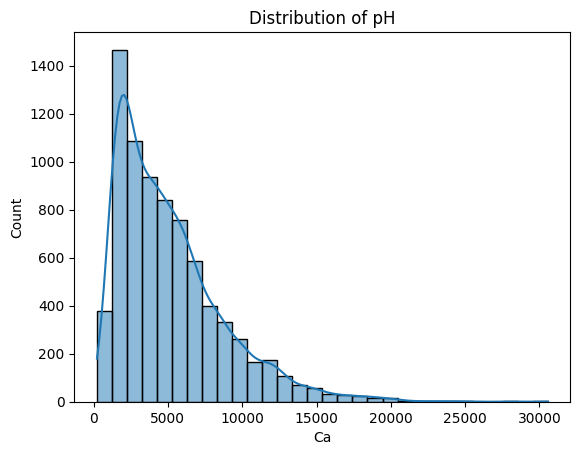

In [14]:
# Basic EDA
sns.histplot(train_df['Ca'], bins=30, kde=True)
plt.title('Distribution of pH')
plt.show()

# Step 6: Let's model ⏳

In [15]:
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

In [16]:
train_df

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46,1300,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52,1400,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,0.362439,15.25,18.900057,16.062401,0.06240,0.030000,44.167717,19.413284,1639.999634,2903.000000,758.999939,2003.999878,1074,24.719807,214.385269,6.725,0.744845,46.00,9.25,8.289246,0.020588,0.003885,1.46,3500,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,0.531739,22.00,17.022963,18.030899,0.03090,0.030000,43.281063,19.539835,1325.000122,2413.000244,631.999939,1961.000000,1044,27.230274,255.713043,6.625,0.708708,43.75,10.00,8.666523,0.016913,0.001714,1.48,2300,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,0.039202,14.75,23.103102,11.000000,0.00000,0.155324,45.654484,18.690720,1628.999512,2685.999023,732.999939,2427.000000,1055,20.434782,86.220909,6.700,0.634153,49.25,7.00,15.139549,0.019791,0.000000,1.43,940,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,site_id_qnYCGg,ID_SL3ETR,70.240079,39.738497,5.40,140,143,1453,66,141,0.945865,26.50,6.670510,18.969999,2.97000,0.030000,27.021521,7.783801,976.999817,2827.999756,642.000000,1369.000000,2650,43.584541,183.406494,5.775,1.652288,32.00,37.25,7.895906,0.017060,0.156563,1.11,1900,2.00,522,1878,305,11.00,124.0,185.0,4.60,2.00,0.39
7740,site_id_qnYCGg,ID_m3eydu,70.241244,39.735097,5.50,141,143,1453,66,141,0.067313,27.00,7.158565,21.340000,4.34000,0.030000,27.021521,7.783801,922.999878,2862.000244,637.999939,1375.000000,2646,43.584541,183.406494,5.525,9.693974,31.00,36.75,6.421572,0.016046,0.203374,1.12,1700,2.00,264,1317,211,12.00,122.0,217.0,5.30,2.50,0.20
7741,site_id_qnYCGg,ID_GGQ39P,70.229183,39.734177,5.50,145,145,1406,65,140,0.915073,28.00,7.004128,19.360001,2.36000,0.030000,26.070765,7.198683,907.000305,3158.999756,661.000061,1360.000122,2609,42.930756,210.942566,5.900,2.426833,30.00,40.50,8.999380,0.018565,0.121901,1.09,2200,3.00,352,1671,228,10.00,142.0,209.0,9.90,2.90,0.30
7742,site_id_qnYCGg,ID_PS0d4J,70.243131,39.756517,5.10,140,142,1420,66,141,0.892854,29.75,4.743186,21.040001,3.04000,0.030000,26.270985,7.136623,819.999878,2973.999512,617.000000,1217.999878,2621,42.040257,182.755829,5.975,2.858275,30.75,36.50,10.369788,0.018623,0.144487,1.11,2400,3.00,366,1507,239,13.00,142.0,264.0,10.00,2.20,0.33


In [17]:
# Feature selection
X = train_df.drop(columns=target_columns + ['PID','site'])
y = train_df[target_columns]
X_test = test_df.drop(columns=['PID','site'])

In [18]:
X

,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46
1,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52
2,70.582553,46.048820,6.95,188,250,1109,111,191,0.362439,15.25,18.900057,16.062401,0.06240,0.030000,44.167717,19.413284,1639.999634,2903.000000,758.999939,2003.999878,1074,24.719807,214.385269,6.725,0.744845,46.00,9.25,8.289246,0.020588,0.003885,1.46
3,70.573267,46.021910,7.83,174,250,1149,112,191,0.531739,22.00,17.022963,18.030899,0.03090,0.030000,43.281063,19.539835,1325.000122,2413.000244,631.999939,1961.000000,1044,27.230274,255.713043,6.625,0.708708,43.75,10.00,8.666523,0.016913,0.001714,1.48
4,70.585330,46.204336,8.07,188,250,869,114,191,0.039202,14.75,23.103102,11.000000,0.00000,0.155324,45.654484,18.690720,1628.999512,2685.999023,732.999939,2427.000000,1055,20.434782,86.220909,6.700,0.634153,49.25,7.00,15.139549,0.019791,0.000000,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,70.240079,39.738497,5.40,140,143,1453,66,141,0.945865,26.50,6.670510,18.969999,2.97000,0.030000,27.021521,7.783801,976.999817,2827.999756,642.000000,1369.000000,2650,43.584541,183.406494,5.775,1.652288,32.00,37.25,7.895906,0.017060,0.156563,1.11
7740,70.241244,39.735097,5.50,141,143,1453,66,141,0.067313,27.00,7.158565,21.340000,4.34000,0.030000,27.021521,7.783801,922.999878,2862.000244,637.999939,1375.000000,2646,43.584541,183.406494,5.525,9.693974,31.00,36.75,6.421572,0.016046,0.203374,1.12
7741,70.229183,39.734177,5.50,145,145,1406,65,140,0.915073,28.00,7.004128,19.360001,2.36000,0.030000,26.070765,7.198683,907.000305,3158.999756,661.000061,1360.000122,2609,42.930756,210.942566,5.900,2.426833,30.00,40.50,8.999380,0.018565,0.121901,1.09
7742,70.243131,39.756517,5.10,140,142,1420,66,141,0.892854,29.75,4.743186,21.040001,3.04000,0.030000,26.270985,7.136623,819.999878,2973.999512,617.000000,1217.999878,2621,42.040257,182.755829,5.975,2.858275,30.75,36.50,10.369788,0.018623,0.144487,1.11


In [19]:
def RMSE(y_pred, y_true):
    return np.sqrt( np.mean((y_pred-y_true)**2) )

In [20]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=50,
                                                   random_state=42, verbose=0))
model.fit(X_train, y_train)

# Predict on validation set
predictions = model.predict(X_test)
y_pred = model.predict(X_val)

print(RMSE(y_pred, y_val))

485.96416927199033


        Feature  Mean Importance   Std Dev
2            pH         0.191767  0.170775
1           lat         0.077318  0.063383
0           lon         0.070741  0.049434
5         bio12         0.047834  0.071181
17          mb2         0.045499  0.039226
14         lstd         0.036780  0.032878
25        snd20         0.035453  0.028480
20         mdem         0.030223  0.021569
19          mb7         0.027932  0.014823
8            bp         0.026899  0.021406
26        soc20         0.026554  0.018786
15         lstn         0.026341  0.014553
10         dows         0.025637  0.012939
24        slope         0.025030  0.012937
28           wp         0.024866  0.013983
27          tim         0.023275  0.011334
23         ph20         0.021455  0.013958
7          bio7         0.020998  0.014031
9         cec20         0.020844  0.009615
11       ecec20         0.020693  0.005885
16          mb1         0.020059  0.009346
6         bio15         0.018505  0.009042
18         

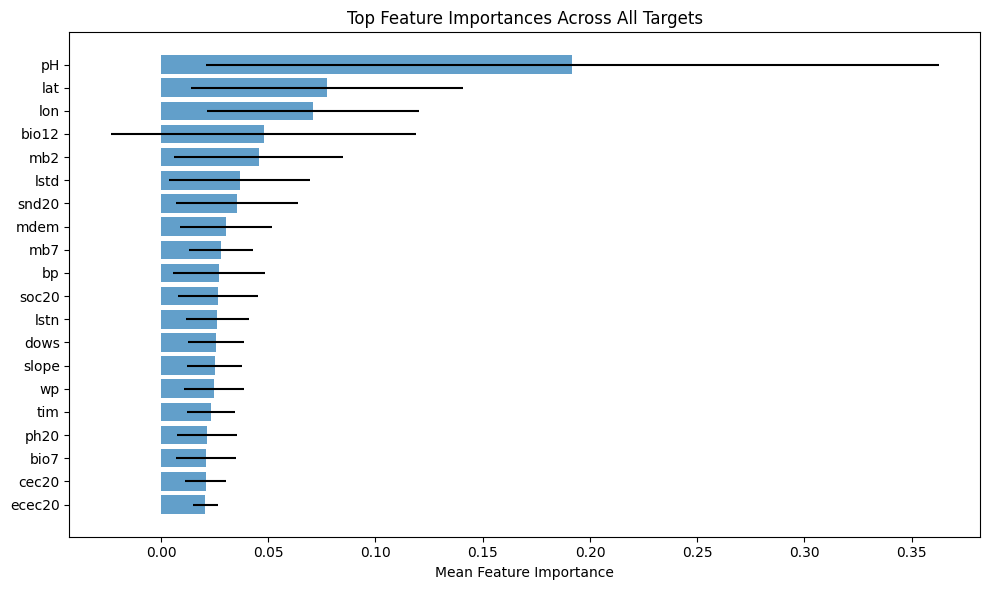

In [21]:
# Extract feature importances from each individual regressor
importances = np.array([est.feature_importances_ for est in model.estimators_])

# Aggregate: mean importance across all targets
mean_importances = importances.mean(axis=0)

# Optional: standard deviation to show variability
std_importances = importances.std(axis=0)

# Create a DataFrame for better readability
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean Importance': mean_importances,
    'Std Dev': std_importances
}).sort_values(by='Mean Importance', ascending=False)

# Print top features
print(importance_df.head(33))

# Optional: Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Mean Importance'][:top_n][::-1],
         xerr=importance_df['Std Dev'][:top_n][::-1], alpha=0.7)
plt.xlabel("Mean Feature Importance")
plt.title("Top Feature Importances Across All Targets")
plt.tight_layout()
plt.show()

## **Step 7: Generate Predictions & Submission File**

Finally, we use our trained model to generate predictions for the test dataset and save them in a CSV file.

### **Why Save Predictions?**
- Predictions are needed for submission to competitions or practical applications.
- The submission format must match the required structure.

### **Tips for Beginners**
- Ensure the column names match the required format.
- Use `to_csv(index=False)` to avoid adding unnecessary row indices.




In [22]:
test_predictions = model.predict(X_test)

In [23]:
# Split the predictions into separate columns
N_pred =  test_predictions[:, 0] * 0.95  # Predictions for N
P_pred =  test_predictions[:, 1]  # Predictions for P
K_pred =  test_predictions[:, 2]  # Predictions for K
Ca_pred = test_predictions[:, 3] * 1.05  # Predictions for Ca
Mg_pred = test_predictions[:, 4]  # Predictions for Mg
S_pred =  test_predictions[:, 5]  # Predictions for S
Fe_pred = test_predictions[:, 6]  # Predictions for Fe
Mn_pred = test_predictions[:, 7]  # Predictions for Mn
Zn_pred = test_predictions[:, 8]  # Predictions for Zn
Cu_pred = test_predictions[:, 9]  # Predictions for Cu
B_pred =  test_predictions[:, 10]  # Predictions for B


In [24]:
submission = pd.DataFrame({'PID': test_df['PID'], 'N': N_pred, 'P': P_pred, 'K': K_pred, 'Ca': Ca_pred, 'Mg': Mg_pred, 'S': S_pred, 'Fe': Fe_pred, 'Mn': Mn_pred, 'Zn': Zn_pred, 'Cu': Cu_pred, 'B': B_pred})
submission.head()

,PID,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,ID_NGS9Bx,1570.35,9.5192,168.22,6618.381,1728.34,10.9976,146.122,150.740,2.5608,4.5416,0.2250
1,ID_YdVKXw,1309.29,7.2166,151.24,6911.352,2335.58,9.9700,119.810,128.640,1.5428,4.9582,0.2078
2,ID_MZAlfE,1922.99,2.5106,177.66,5901.924,1761.44,8.8192,128.878,165.120,1.6794,4.6936,0.2462
3,ID_GwCCMN,1741.35,1.4592,164.42,6272.784,1975.06,9.7770,132.880,159.880,2.3424,4.3204,0.2426
4,ID_K8sowf,1607.21,6.2962,227.38,6769.896,1328.64,7.9022,121.240,130.794,1.6164,4.5552,0.1882


In [25]:
# prompt: turn submission into a 3 column file that has the column PID, Nutrient, Value

submission_melted = submission.melt(id_vars=['PID'], var_name='Nutrient', value_name='Available_Nutrients_in_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

,PID,Nutrient,Available_Nutrients_in_ppm
19869,ID_002W8m,Zn,4.0700
15033,ID_002W8m,Fe,189.1260
2943,ID_002W8m,P,7.5268
24705,ID_002W8m,B,0.4606
525,ID_002W8m,N,2377.8500


# Calculate the nutrient gaps

Transform your predicted ppm values to available nutrients (kg/ha) to determine the nutrient gaps.

We are determining the nutrients needed for Maize crops to yeild 4 tons/ha at a depth of 20cm.

Available nutrients are calculated by

`Available (kg/ha) = ppm × soil depth (cm) × bulk density (g/cm³) × 0.1`

In [26]:
# prompt: merge test_gap_df with submission_melted on PID and Nutrient
nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')


In [27]:
nutrient_df 

,Nutrient,Required,PID,BulkDensity,Available_Nutrients_in_ppm
0,N,100.00,ID_NGS9Bx,1.20,1570.3500
1,P,40.00,ID_NGS9Bx,1.20,9.5192
2,K,52.00,ID_NGS9Bx,1.20,168.2200
3,Ca,12.00,ID_NGS9Bx,1.20,6618.3810
4,Mg,8.00,ID_NGS9Bx,1.20,1728.3400
...,...,...,...,...,...
26593,Fe,0.80,ID_oMn2Yb,1.14,182.9320
26594,Mn,0.40,ID_oMn2Yb,1.14,167.0360
26595,Zn,0.40,ID_oMn2Yb,1.14,4.1424
26596,Cu,0.20,ID_oMn2Yb,1.14,1.9046


In [28]:
soil_depth = 20  # cm

# Calculate the Available_Nutrients_in_kg_ha
nutrient_df['Available_Nutrients_in_kg_ha'] = (nutrient_df['Available_Nutrients_in_ppm']
                                               * soil_depth * nutrient_df['BulkDensity'] * 0.1)

In [29]:
nutrient_df.head()

,Nutrient,Required,PID,BulkDensity,Available_Nutrients_in_ppm,Available_Nutrients_in_kg_ha
0,N,100.0,ID_NGS9Bx,1.2,1570.3500,3768.84000
1,P,40.0,ID_NGS9Bx,1.2,9.5192,22.84608
2,K,52.0,ID_NGS9Bx,1.2,168.2200,403.72800
3,Ca,12.0,ID_NGS9Bx,1.2,6618.3810,15884.11440
4,Mg,8.0,ID_NGS9Bx,1.2,1728.3400,4148.01600


In [30]:
nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

In [31]:
nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
nutrient_df = nutrient_df[['ID', 'Gap']]
nutrient_df

,ID,Gap
0,ID_NGS9Bx_N,-3668.840000
1,ID_NGS9Bx_P,17.153920
2,ID_NGS9Bx_K,-351.728000
3,ID_NGS9Bx_Ca,-15872.114400
4,ID_NGS9Bx_Mg,-4140.016000
...,...,...
26593,ID_oMn2Yb_Fe,-416.284960
26594,ID_oMn2Yb_Mn,-380.442080
26595,ID_oMn2Yb_Zn,-9.044672
26596,ID_oMn2Yb_Cu,-4.142488


If a value is negative it means there is excess of that nutrient in the soil already and the farmer does not need to add any more. If the value is positive then the farmer needs to add those nutrients to the soil.

In [32]:
nutrient_df.to_csv('submission-rf_little_fe_postprocess.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


### 🧾 Summary of Key Differences Between This Notebook and the Previous One
This notebook builds upon the earlier version, with a few notable changes:

1. Simplified Feature Engineering
Unlike the previous notebook, which included extensive and detailed feature engineering, this version uses a more minimal set of features for model training.

2. Postprocessing Enhancements
This notebook introduces light postprocessing steps, specifically targeting improvements on the predicted values for Calcium (Ca) and Nitrogen (N) to refine their accuracy.

These are the main updates that distinguish this notebook from the earlier version (Random Forest Extensive Feature Engineering notebook).